In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/healthcare-dataset-stroke-data.csv")

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.groupby('gender')['bmi'].median()

gender
Female    27.8
Male      28.4
Other     22.4
Name: bmi, dtype: float64

In [ ]:
age_group=[]
for i in df['age']:
  if i<=5.0:
    age_group.append('Kid')
  elif i>5.0 and i<20.0:
    age_group.append('Teen')
  elif i>=20.0 and i<60:
    age_group.append('Adult')
  else:
    age_group.append('Senior')

In [ ]:
df['age_group']=age_group
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [ ]:
df.groupby('age_group')['bmi'].median()

age_group
Adult     29.3
Kid       18.2
Senior    29.2
Teen      22.4
Name: bmi, dtype: float64

In [ ]:
def impute_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    if pd.isnull(bmi):
        if age_group == 'Senior':
          return 29.2
        elif age_group == 'Adult':
          return 29.3
        elif age_group == 'Teen':
          return 22.4
        else:
          return 18.2
    else:
        return bmi

In [ ]:
df['bmi']=df[['bmi','age_group']].apply(impute_bmi,axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.2,never smoked,1,Senior
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [ ]:
df.drop('age_group',axis=1,inplace=True)

In [ ]:
categorical_feature=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

In [ ]:
df.drop(df.loc[df['gender']=='Other'].index,inplace=True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

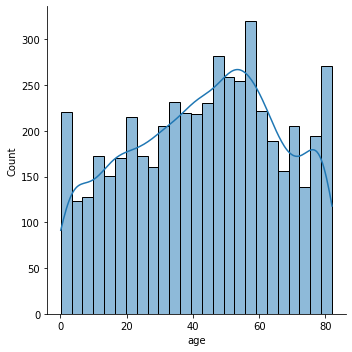

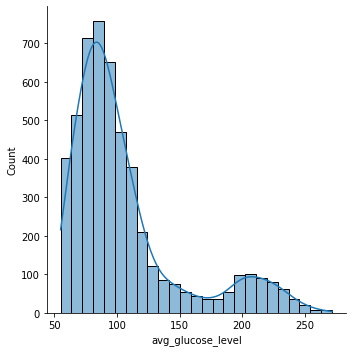

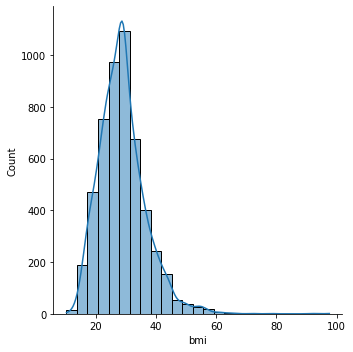

In [ ]:
numerical_feature=['age','avg_glucose_level','bmi']
for feature in numerical_feature:
  sns.displot(df[feature],kde=True,bins=25)

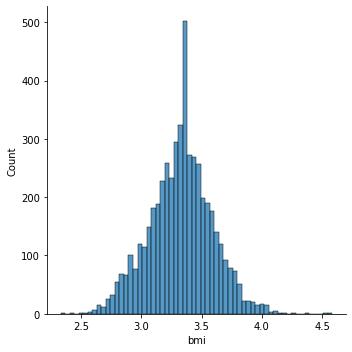

In [ ]:
df['bmi']=np.log(df['bmi'])
sns.displot(df['bmi'])

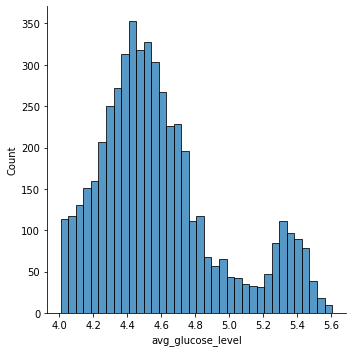

In [ ]:
df['avg_glucose_level']=np.log(df['avg_glucose_level'])
sns.displot(df['avg_glucose_level'])

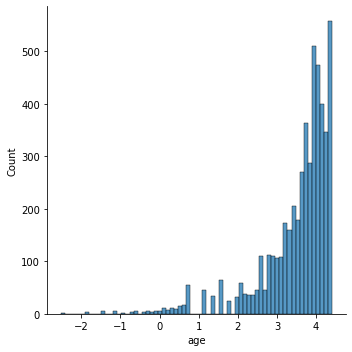

In [ ]:
df['age']=np.log(df['age'])
sns.displot(df['age'])

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
categorical_fea=[feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_fea].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [ ]:
for feature in categorical_fea:
  df[feature]=encoder.fit_transform(df[feature])

In [ ]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

In [ ]:
from imblearn.under_sampling  import RandomUnderSampler
# from imblearn.over_sampling  import RandomOverSampler
OS=RandomUnderSampler()
# OS=RandomOverSampler()
from collections import Counter
X_os,y_os=OS.fit_resample(X,y)

In [ ]:
print('the number of classes before fit {}'.format(Counter(y)))
print('the number of classes after fit {}'.format(Counter(y_os)))

the number of classes before fit Counter({0: 4860, 1: 249})
the number of classes after fit Counter({0: 249, 1: 249})


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.2,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
log_class=LogisticRegression()

In [ ]:
grid={'C':10.0**np.arange(0,10)}
cv=KFold(n_splits=5,shuffle=False,random_state=None) 

In [ ]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro') 
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])},
             scoring='f1_macro')

In [ ]:
y_pred=clf.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[33 15]
 [ 6 46]]
0.8141592920353982
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        48
           1       0.75      0.88      0.81        52

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



In [ ]:
from sklearn.ensemble import VotingClassifier,BaggingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier
classifier=RandomForestClassifier(criterion='entropy')
classifier.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_predRFC=classifier.predict(X_test_scaled)
print(confusion_matrix(y_test,y_predRFC))
print(f1_score(y_test,y_predRFC))
print(classification_report(y_test,y_predRFC))

[[32 16]
 [ 9 43]]
0.7747747747747747
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        48
           1       0.73      0.83      0.77        52

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train_scaled,y_train)
y_predNB=classifier.predict(X_test_scaled)
print(confusion_matrix(y_test,y_predNB))
print(f'F1: {f1_score(y_test,y_predNB)}')
print(classification_report(y_test,y_predNB))

ImportError: ignored

In [ ]:
from sklearn.model_selection import KFold,GridSearchCV
kfold=KFold(n_splits=5)
model=AdaBoostClassifier(n_estimators=1)
res=cross_val_score(model,X_test_scaled,y_test,cv=kfold,scoring='f1')
print(res.mean())

y_predNB=model.predict(X_test_scaled)
print(confusion_matrix(y_test,y_predNB))
print(f'F1: {f1_score(y_test,y_predNB)}')
print(classification_report(y_test,y_predNB))

0.8015466015466016


NotFittedError: ignored

In [ ]:
param_grid = {'n_estimators':range(1,30,1)}
clf = GridSearchCV(AdaBoostClassifier(random_state=42), 
                   param_grid = param_grid, scoring='f1', 
                   cv=cv).fit(X_train_scaled, y_train)
print(clf.best_estimator_) 
print("F1:",clf.best_score_)

y_predNB=clf.predict(X_test_scaled)
print(confusion_matrix(y_test,y_predNB))
print(f'F1: {f1_score(y_test,y_predNB)}')
print(classification_report(y_test,y_predNB))

AdaBoostClassifier(n_estimators=1, random_state=42)
F1: 0.7621511393321003
[[29 19]
 [ 3 49]]
F1: 0.8166666666666668
              precision    recall  f1-score   support

           0       0.91      0.60      0.72        48
           1       0.72      0.94      0.82        52

    accuracy                           0.78       100
   macro avg       0.81      0.77      0.77       100
weighted avg       0.81      0.78      0.77       100



In [ ]:
gaus=GaussianNB()
ada=AdaBoostClassifier(n_estimators=1)
logreg=LogisticRegression()

voting_clf=VotingClassifier(estimators=[('GaussianNB',gaus),('AdaBoost',ada),('LogReg',logreg)],voting='hard')
voting_clf.fit(X_train_scaled,y_train)

y_predNB=voting_clf.predict(X_test_scaled)
print(confusion_matrix(y_test,y_predNB))
print(f'F1: {f1_score(y_test,y_predNB)}')
print(classification_report(y_test,y_predNB))

[[30 18]
 [ 3 49]]
F1: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.91      0.62      0.74        48
           1       0.73      0.94      0.82        52

    accuracy                           0.79       100
   macro avg       0.82      0.78      0.78       100
weighted avg       0.82      0.79      0.78       100



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42,criterion='entropy')
path = dtc.cost_complexity_pruning_path(X_train_scaled,y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities
# print(ccp_alphas,impurities)

Text(0.5, 1.0, 'Total impurity vs effective alpha for training set')

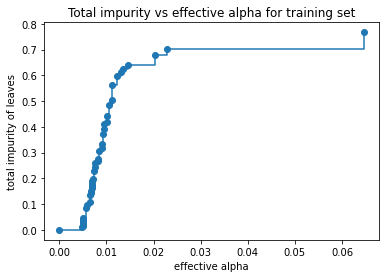

In [ ]:
fig,ax = plt.subplots()
ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o',drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total impurity vs effective alpha for training set')

In [ ]:
clfs=[]
for ccp_alpha in ccp_alphas:
  dtc=DecisionTreeClassifier(criterion='entropy',random_state=42,ccp_alpha=ccp_alpha)
  dtc.fit(X_train_scaled,y_train)
  clfs.append(dtc)

Text(0, 0.5, 'total depth')

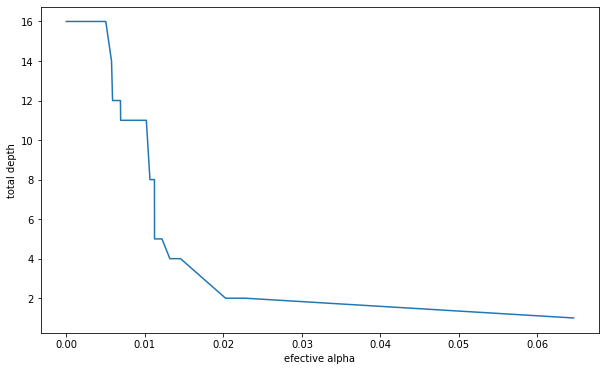

In [ ]:
tree_depths = [dtc.tree_.max_depth for dtc in clfs]
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1],tree_depths[:-1])
plt.xlabel('efective alpha')
plt.ylabel('total depth')

0.8067226890756303
0.0121835663078483
0.013185313056585476


Text(0, 0.5, 'F1 scores')

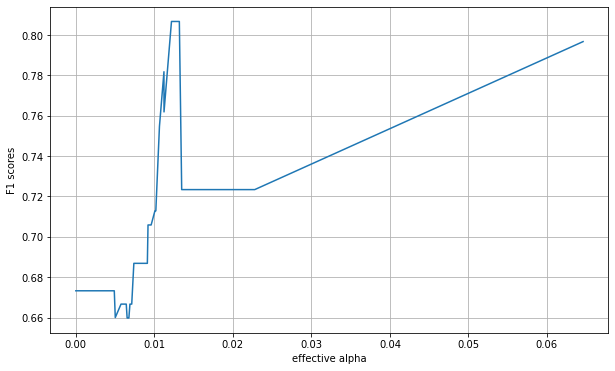

In [ ]:
scores = [f1_score(y_test,dtc.predict(X_test_scaled)) for dtc in clfs]

tree_depths = [dtc.tree_.max_depth for dtc in clfs]

print(max(scores))


for x,y in zip(ccp_alphas,scores):
  if y==max(scores):
    print(x)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(ccp_alphas[:-1],scores[:-1])
plt.xlabel('effective alpha')
plt.ylabel('F1 scores')

0.77
0.0121835663078483
0.013185313056585476


Text(0, 0.5, 'accuracy scores')

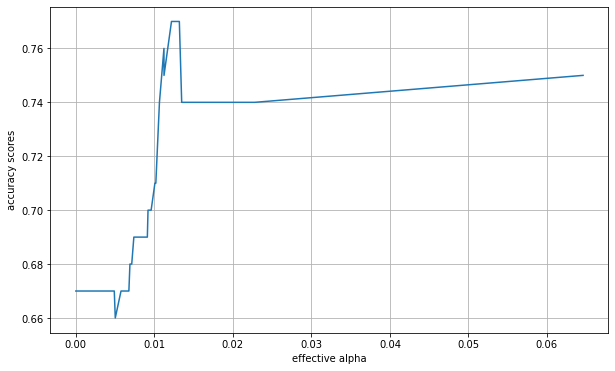

In [ ]:
scores = [accuracy_score(y_test,dtc.predict(X_test_scaled)) for dtc in clfs]

tree_depths = [dtc.tree_.max_depth for dtc in clfs]

print(max(scores))

for x,y in zip(ccp_alphas,scores):
  if y==max(scores):
    print(x)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(ccp_alphas[:-1],scores[:-1])
plt.xlabel('effective alpha')
plt.ylabel('accuracy scores')

0.9423076923076923
0.06460376391778411


Text(0, 0.5, 'recall scores')

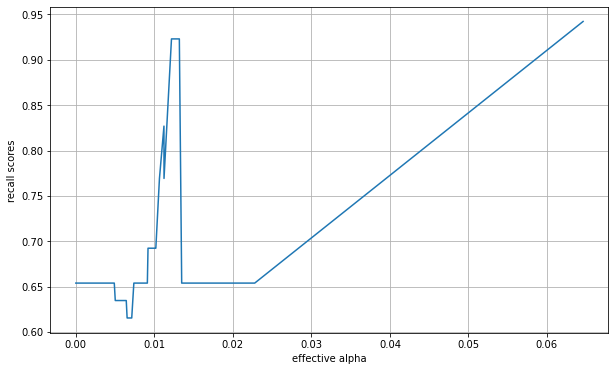

In [ ]:
scores = [recall_score(y_test,dtc.predict(X_test_scaled)) for dtc in clfs]

tree_depths = [dtc.tree_.max_depth for dtc in clfs]

print(max(scores))

for x,y in zip(ccp_alphas,scores):
  if y==max(scores):
    print(x)


plt.figure(figsize=(10,6))
plt.grid()
plt.plot(ccp_alphas[:-1],scores[:-1])
plt.xlabel('effective alpha')
plt.ylabel('recall scores')

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
grid=dict()
grid['solver']=['svd','eigen','lsqr']
gd=GridSearchCV(lda,grid,scoring='f1',cv=cv,n_jobs=15)

res=gd.fit(X_test_scaled,y_test)

print(res.best_score_)
print(res.best_params_)

0.6997121397121399
{'solver': 'eigen'}


[-9.28965143]
[[ 0.91185951 -0.97685241  1.30530352]]


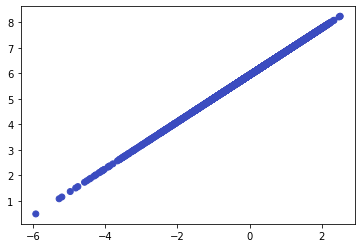

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()

y=df['stroke']
X=df[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi']]

X_lda=lda.fit(X,y).transform(X)

print(lda.intercept_)
print(lda.coef_)
plt.scatter(X_lda,np.dot(lda.coef_,X.T),c=y,cmap='coolwarm')